In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud, STOPWORDS

In [ ]:

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, Dense, LSTM, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
True_data = pd.read_csv('/content/drive/MyDrive/Final_Real_News.csv')

In [ ]:
True_data.head()

,ID,News_Title,News_Text,Label
0,1,Pakistan Agrees To A Transparent Probe Into Po...,The Pakistani government and opposition have a...,Real
1,2,Aamir Liaquat not allowed to meet with PM Imra...,Security authorities refused Aamir Liaquat Hus...,Real
2,3,Pakistan exPM Nawaz Sharif given 10year jail term,Judge Mohammad Bashir ordered Sharif to serve ...,Real
3,4,Prime Minister Imran Khan visits PIMS Hospital...,Imran Khan enquired about the administrations ...,Real
4,5,ExPM Nawaz Sharif and daughter arrested on ret...,The Sharifs landed in Pakistan second city on ...,Real


In [ ]:
True_data.columns

Index(['ID', 'News_Title', 'News_Text', 'Label'], dtype='object')

In [ ]:
True_data.info

<bound method DataFrame.info of         ID                                         News_Title  \
0        1  Pakistan Agrees To A Transparent Probe Into Po...   
1        2  Aamir Liaquat not allowed to meet with PM Imra...   
2        3  Pakistan exPM Nawaz Sharif given 10year jail term   
3        4  Prime Minister Imran Khan visits PIMS Hospital...   
4        5  ExPM Nawaz Sharif and daughter arrested on ret...   
...    ...                                                ...   
2975  2976  Pakistan playing key role for Afghan peace: Fawad   
2976  2977        NAB summons Shehbaz in Pindi metro bus case   
2977  2978  Pakistan, India issue diplomatic visas to each...   
2978  2979  Hekmatyar tells India not to meddle in Afghan ...   
2979  2980           Maryam Nawaz tests negative for Covid-19   

                                              News_Text Label  
0     The Pakistani government and opposition have a...  Real  
1     Security authorities refused Aamir Liaquat Hus...  Re

In [ ]:
True_data = True_data.dropna()

In [ ]:
# df = pd.DataFrame(True_data)
# df1=df.dropna()
# df1=df.dropna(axis=0)



In [ ]:
# # # Reset index after drop
# df1=df.dropna().reset_index(drop=True)

# # # Drop row that has all NaN values
# df2=df.dropna(how='all')

In [ ]:
# df2=df.dropna(subset=['News_Title','News_Text'])

# # # With threshold, 
# # # Keep only the rows with at least 2 non-NA values.
# df2=df.dropna(thresh=2)

# print(df2)

In [ ]:

text = " ".join(map(str, True_data['News_Text'].tolist()))

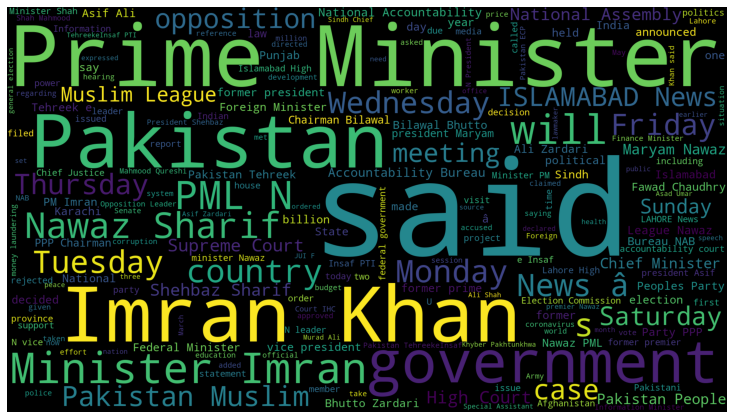

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
Fake_data = pd.read_csv('/content/drive/MyDrive/Final_Fake_News.csv')

In [ ]:
Fake_data.head()

,ID,News_Title,News_Text,Label
0,1,Maryam Nawaz Chairperson Of youth Programmer,When Maryam Nawaz was appointed as the chairpe...,Fake
1,2,Incumbent government has announced a new crack...,Incumbent government has announced a new crack...,Fake
2,3,Dismissal of IG Islamabad,Dissmissal of IG Islamabad on not attending th...,Fake
3,4,Zulfi Bukharis sister appointed Chairperson Be...,We saved billions of rupees in different proje...,Fake
4,5,Pakistani PM Imran Khan says Jesus Christ Neve...,Pakistani Prime Minister Imran Khan openly sai...,Fake


In [ ]:
Fake_data.columns

Index(['ID', 'News_Title', 'News_Text', 'Label'], dtype='object')

In [ ]:
Fake_data = Fake_data.dropna()

In [ ]:
text1 = " ".join(map(str, Fake_data['News_Text'].tolist()))

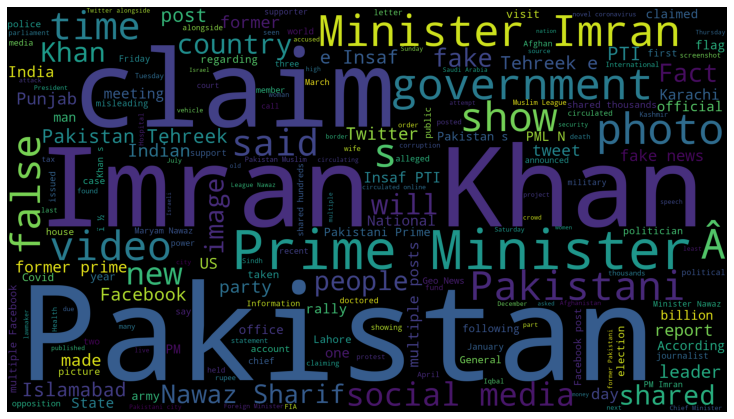

In [ ]:
wordcloud = WordCloud(width=1920, height=1080).generate(text1)
fig = plt.figure(figsize=(10, 10))
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [ ]:
empty_fake_index = [index for index,text in enumerate(Fake_data.News_Text.tolist()) if str(text).strip() == ""]

In [ ]:
Fake_data.iloc[empty_fake_index]

,ID,News_Title,News_Text,Label


In [ ]:
True_data['News_Text'] = True_data['News_Title']+ " " + True_data['News_Text']
Fake_data['News_Text'] = Fake_data['News_Title']+ " " + Fake_data['News_Text']

In [ ]:
True_data['News_Text'] = True_data['News_Text'].apply(lambda x: str(x).lower())

In [ ]:
Fake_data['News_Text'] = Fake_data['News_Text'].apply(lambda x: str(x).lower())

In [ ]:
True_data['class'] = 1
Fake_data['class'] = 0

In [ ]:
Fake_data.head()

,ID,News_Title,News_Text,Label,class
0,1,Maryam Nawaz Chairperson Of youth Programmer,maryam nawaz chairperson of youth programmer w...,Fake,0
1,2,Incumbent government has announced a new crack...,incumbent government has announced a new crack...,Fake,0
2,3,Dismissal of IG Islamabad,dismissal of ig islamabad dissmissal of ig is...,Fake,0
3,4,Zulfi Bukharis sister appointed Chairperson Be...,zulfi bukharis sister appointed chairperson be...,Fake,0
4,5,Pakistani PM Imran Khan says Jesus Christ Neve...,pakistani pm imran khan says jesus christ neve...,Fake,0


In [ ]:
True_data = True_data[['News_Text', 'class']]
Fake_data = Fake_data[['News_Text', 'class']]

In [ ]:
data = True_data.append(Fake_data, ignore_index=True)

In [ ]:
data.sample(15)

,News_Text,class
2635,ehsaas kitchen trucks to reach other cities mi...,1
2160,"broadsheet ceo apologises to nawaz, blames nab...",1
3090,cm usman buzdars protocol allegedly killed a t...,0
748,no enemy can defeat a nation so united in purp...,1
727,pm's karachi visit can be a day of positive ch...,1
139,pompeo meeting fm qureshi says no do more dema...,1
3687,did pakistan pm read covid-19 chart upside dow...,0
3530,said nothing against eu pm imran khan prime mi...,0
3047,fake picture of reham khan with tayyip erdogan...,0
2333,"pdm serves show cause notices to ppp, anp for ...",1


In [ ]:
from sklearn.utils import shuffle
data = shuffle(data)
data.head()

,News_Text,class
1581,sc issues written verdict regarding rejection ...,1
3413,olympic javelin thrower arshad nadeem said tha...,0
1277,main character imran khan hasnâ€™t been mentio...,1
2531,nab recovers rs24b in fake accounts scam the n...,1
1897,japan contributes $2.1m to afghan refugees in ...,1


In [ ]:
!pip install spacy==2.2.3 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 65.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.1/211.1 KB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 104.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 77.6 MB/s eta 0:00:00
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.5
    Uninstalling srsly-2.4.5:
      Successfully uninstalled srsly-2.4.5
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: blis
    Found existing installation: blis 0.7.9
    Uninstalling blis-0.7.9:
      Successfully uninstalled blis-0.7.9
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.6
    Uninstalling thinc-8.1.6:
      Successfully 

In [ ]:
!python -m spacy download en_core_web_sm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 205.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for en_core_web_sm: filename=en_core_web_sm-2.2.5-py3-none-any.whl size=12011738 sha256=e73ca67d96db2d733ad1a726b652475389b4841c7c7891619d95f33595ce0f9f
  Stored in directory: /tmp/pip-ephem-wheel-cache-xbago93_/wheels/77/b4/c8/395804b9a2b6864aaff3623d7b709680acc3d04f47c8162ee6
Successfully built en_core_web_sm
  Attempting uninstall: en_core_web_sm
    Found existing installation: en-core-web-sm 3.4.1
    Uninstalling en-core-web-sm-3.4.1:
      Successfully uninstalled en-core-web-sm-3.4.1
✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [ ]:
!pip install beautifulsoup4==4.9.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 KB 3.6 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [ ]:
!pip install textblob==0.15.3 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-28s82fxu
  Running command git clone --filter=blob:none --quiet https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-28s82fxu
  Resolved https://github.com/laxmimerit/preprocess_kgptalkie.git to commit 9ca68d37027af9f6a30d54640347ce3b2e2694b3
  Preparing metadata (setup.py) ... done
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11755 sha256=f705aed9f30f817c788f890993bdca3b8ba18df3f0c9e07f4e0df4098dc8acdb
  Stored in directory: /tmp/pip-ephem-wheel-cache-p1seimxg/wheels/fd/71/47/e04f208ad659a295ccb69022e14de7d20ccc6fc30a5a935f09
Successfully built preprocess-kgptalkie


In [ ]:
import preprocess_kgptalkie as ps

In [ ]:
data['News_Text'] = data['News_Text'].apply(lambda x: ps.remove_special_chars(x))

In [ ]:
#Vectoriztion
import gensim


In [ ]:
y = data['class'].values

In [ ]:
data['News_Text'].tolist()

['sc issues written verdict regarding rejection of mukhtaran mais review appeal the supreme court on wednesday issued a detailed written judgement regarding the rejection of review appeal filed by mukhtaran mai against the acquittal of 13 people accused in the gangrape case',
 'olympic javelin thrower arshad nadeem said that pmlns nawaz sharifs political struggle inspired him to win pakistans olympic javelin thrower arshad nadeem said that pmlns nawaz sharifs political struggle inspired him to win a gold medal at the commonwealth games 2022 despite an injury',
 'main character imran khan hasnât been mentioned in sugar commission report abbasi rawalpindi 92 news â pmln leader shahid khaqan abbasi has said that the main character imran khan has not been mentioned in the sugar inquiry commission reportâaddressing a press conference on saturday he said that facts and responsible have been concealed in the reportâ',
 'nab recovers rs24b in fake accounts scam the national accountability bure

In [ ]:
from numpy.lib.shape_base import split
X = [d.split() for d in data['News_Text'].tolist()]

In [ ]:
print(X[0])

['sc', 'issues', 'written', 'verdict', 'regarding', 'rejection', 'of', 'mukhtaran', 'mais', 'review', 'appeal', 'the', 'supreme', 'court', 'on', 'wednesday', 'issued', 'a', 'detailed', 'written', 'judgement', 'regarding', 'the', 'rejection', 'of', 'review', 'appeal', 'filed', 'by', 'mukhtaran', 'mai', 'against', 'the', 'acquittal', 'of', '13', 'people', 'accused', 'in', 'the', 'gangrape', 'case']


In [ ]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)

13581

In [ ]:
#w2v_model.wv.vocab['pti']

In [ ]:
w2v_model.wv.vocab

{'sc': <gensim.models.keyedvectors.Vocab at 0x7fcd3ddbb670>,
 'issues': <gensim.models.keyedvectors.Vocab at 0x7fcd3efc2430>,
 'written': <gensim.models.keyedvectors.Vocab at 0x7fcd3ddc4d90>,
 'verdict': <gensim.models.keyedvectors.Vocab at 0x7fcd3ddc4e50>,
 'regarding': <gensim.models.keyedvectors.Vocab at 0x7fcd3ddc46a0>,
 'rejection': <gensim.models.keyedvectors.Vocab at 0x7fcd3ddc4460>,
 'of': <gensim.models.keyedvectors.Vocab at 0x7fcd3ddc4220>,
 'mukhtaran': <gensim.models.keyedvectors.Vocab at 0x7fcd3ddc4e80>,
 'mais': <gensim.models.keyedvectors.Vocab at 0x7fcd3ddc4ee0>,
 'review': <gensim.models.keyedvectors.Vocab at 0x7fcd3ddc4f40>,
 'appeal': <gensim.models.keyedvectors.Vocab at 0x7fcd3ddc4f70>,
 'the': <gensim.models.keyedvectors.Vocab at 0x7fcd3ddc4fd0>,
 'supreme': <gensim.models.keyedvectors.Vocab at 0x7fcd3d0ef040>,
 'court': <gensim.models.keyedvectors.Vocab at 0x7fcd3d0ef0a0>,
 'on': <gensim.models.keyedvectors.Vocab at 0x7fcd3d0ef100>,
 'wednesday': <gensim.models.ke

In [ ]:
w2v_model.wv['pakistan']

array([-0.21746226,  0.4059409 ,  0.3669158 ,  0.08470046,  1.1471329 ,
        1.167697  , -1.0598048 ,  1.5718651 ,  0.7585428 , -0.08805939,
       -0.7867619 , -0.43393332, -1.2935044 , -0.0911752 ,  0.0980523 ,
        1.7572875 ,  1.027809  , -0.13021202, -0.48000816,  0.6948869 ,
       -0.48807964, -1.0122976 ,  0.20891826,  0.21245077, -0.33585632,
        0.0394142 , -0.06965941, -1.2451428 , -0.53379583,  0.23780672,
        1.6539834 , -1.5385454 , -0.0035406 ,  0.35522017,  0.05999374,
        1.1105286 ,  0.98196894,  2.1693206 , -0.96100783, -0.9521677 ,
        0.50405   ,  0.90449494,  0.43756318,  0.79789734,  0.3173223 ,
       -0.2431287 ,  1.6062706 , -0.5544334 ,  1.337366  , -0.45094973,
       -0.12771137, -0.32322532,  0.0538839 ,  0.919777  ,  0.72673845,
        0.8001759 , -0.7393129 , -1.0784681 ,  0.05995188, -0.91497266,
        1.0267656 ,  0.15022728,  1.6536005 , -1.6270325 ,  0.41137946,
       -0.4647514 ,  1.4276419 , -0.8864109 ,  0.2563372 ,  0.24

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X)

In [ ]:
X = tokenizer.texts_to_sequences(X)

In [ ]:
X

[[211,
  417,
  933,
  639,
  230,
  2423,
  2,
  5543,
  7912,
  436,
  1116,
  1,
  115,
  34,
  5,
  96,
  184,
  6,
  1894,
  933,
  3827,
  230,
  1,
  2423,
  2,
  436,
  1116,
  308,
  18,
  5543,
  7913,
  32,
  1,
  1339,
  2,
  621,
  73,
  315,
  4,
  1,
  7914,
  49],
 [5544,
  5545,
  4526,
  1677,
  2205,
  15,
  11,
  1080,
  21,
  198,
  106,
  1480,
  3828,
  114,
  3,
  1282,
  111,
  5544,
  5545,
  4526,
  1677,
  2205,
  15,
  11,
  1080,
  21,
  198,
  106,
  1480,
  3828,
  114,
  3,
  1282,
  6,
  2972,
  7915,
  33,
  1,
  5546,
  5547,
  553,
  418,
  35,
  5548],
 [1081,
  4527,
  13,
  14,
  4528,
  45,
  1481,
  4,
  333,
  168,
  234,
  260,
  554,
  65,
  37,
  78,
  38,
  57,
  437,
  455,
  260,
  12,
  15,
  11,
  1,
  1081,
  4527,
  13,
  14,
  12,
  31,
  45,
  1481,
  4,
  1,
  333,
  695,
  168,
  7916,
  6,
  488,
  341,
  5,
  112,
  22,
  15,
  11,
  1783,
  7,
  903,
  56,
  45,
  5549,
  4,
  1,
  7917],
 [63,
  4529,
  7918,
  4,
  69,
  216

In [ ]:
tokenizer.word_index

{'the': 1,
 'of': 2,
 'to': 3,
 'in': 4,
 'on': 5,
 'a': 6,
 'and': 7,
 'pakistan': 8,
 'minister': 9,
 'for': 10,
 'that': 11,
 'has': 12,
 'imran': 13,
 'khan': 14,
 'said': 15,
 'is': 16,
 'prime': 17,
 'by': 18,
 'with': 19,
 'was': 20,
 'nawaz': 21,
 'he': 22,
 'from': 23,
 'government': 24,
 'his': 25,
 'pm': 26,
 'as': 27,
 'sharif': 28,
 'will': 29,
 'be': 30,
 'not': 31,
 'against': 32,
 'at': 33,
 'court': 34,
 'an': 35,
 'former': 36,
 'news': 37,
 'pmln': 38,
 'pti': 39,
 'national': 40,
 'it': 41,
 'islamabad': 42,
 'president': 43,
 'chief': 44,
 'been': 45,
 'after': 46,
 'zardari': 47,
 'party': 48,
 'case': 49,
 'over': 50,
 'its': 51,
 'federal': 52,
 'ppp': 53,
 'opposition': 54,
 'had': 55,
 'have': 56,
 'leader': 57,
 'sindh': 58,
 'punjab': 59,
 'says': 60,
 'maryam': 61,
 'are': 62,
 'nab': 63,
 'country': 64,
 '92': 65,
 'meeting': 66,
 'pakistani': 67,
 'govt': 68,
 'fake': 69,
 'asif': 70,
 'shehbaz': 71,
 'ali': 72,
 'people': 73,
 'assembly': 74,
 'claim': 7

In [ ]:
#[len(x) for x in X]

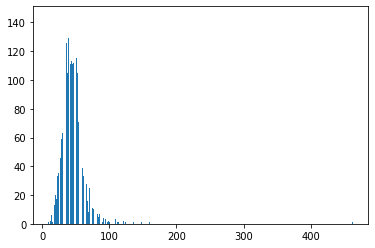

In [ ]:
# no of words in per news text data - row (histogram)
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [ ]:
nos = np.array([len(x) for x in X])
len(nos[nos>70])

228

In [ ]:
maxlen = 1000
X = pad_sequences(X, maxlen=maxlen)

In [ ]:
len(X[0])

1000

In [ ]:
vocab_size = len(tokenizer.word_index) + 1
vocab = tokenizer.word_index

In [ ]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))

  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]

    return weight_matrix

In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
# each row has size of vector which is hundred
embedding_vectors.shape

(13582, 100)

# Model 1: LSTM Model

In [ ]:
from keras.models import Sequential 

In [ ]:
model1 = Sequential()
model1.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=True))
model1.add(Dropout(0.3))
model1.add(LSTM(units=100))
model1.add(Dropout(0.3))
model1.add(Dense(1, activation='sigmoid'))

#Compiling the model
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#model.compile(optimizer='adam',loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         1358200   
                                                                 
 dropout (Dropout)           (None, 1000, 100)         0         
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,438,701
Trainable params: 1,438,701
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
model1.fit(X_train, y_train, validation_split=0.3, epochs=10)

Epoch 1/10
66/66 [==============================] - 16s 96ms/step - loss: 0.5514 - accuracy: 0.7617 - val_loss: 0.5428 - val_accuracy: 0.7380
Epoch 2/10
66/66 [==============================] - 5s 69ms/step - loss: 0.3782 - accuracy: 0.8385 - val_loss: 0.3606 - val_accuracy: 0.8387
Epoch 3/10
66/66 [==============================] - 4s 59ms/step - loss: 0.1534 - accuracy: 0.9553 - val_loss: 0.3183 - val_accuracy: 0.8679
Epoch 4/10
66/66 [==============================] - 3s 45ms/step - loss: 0.0488 - accuracy: 0.9904 - val_loss: 0.3718 - val_accuracy: 0.8723
Epoch 5/10
66/66 [==============================] - 3s 46ms/step - loss: 0.0180 - accuracy: 0.9971 - val_loss: 0.4826 - val_accuracy: 0.8802
Epoch 6/10
66/66 [==============================] - 3s 44ms/step - loss: 0.0111 - accuracy: 0.9981 - val_loss: 0.5522 - val_accuracy: 0.7984
Epoch 7/10
66/66 [==============================] - 3s 45ms/step - loss: 0.0715 - accuracy: 0.9793 - val_loss: 0.5144 - val_accuracy: 0.8544
Epoch 8/10
6

In [ ]:
y_predLSTM = (model1.predict(X_test) >=0.5).astype(int)


31/31 [==============================] - 1s 16ms/step


In [ ]:
accuracy_score(y_test, y_predLSTM)

0.876008064516129

In [ ]:
model1.save('All_NN_Models/model1.h5')

In [ ]:
print(classification_report(y_test, y_predLSTM))

              precision    recall  f1-score   support

           0       0.76      0.73      0.74       242
           1       0.91      0.92      0.92       750

    accuracy                           0.88       992
   macro avg       0.83      0.83      0.83       992
weighted avg       0.87      0.88      0.88       992



In [ ]:
input1 = ['PML-N leader lands in Lahore after four-month stay in London; says cannot give definitive date of Nawazs return']
input1 = tokenizer.texts_to_sequences(input1)
input1 = pad_sequences(input1, maxlen=maxlen)
#(model.predict(x) >=0.5).astype(int)

In [ ]:
prediction = (model1.predict(input1) >= 0.5).astype(int)
print(prediction)
if (prediction==0):
  print('The news is Fake')
else:
  print('The news is Real')

1/1 [==============================] - 0s 53ms/step
[[1]]
The news is Real


# BI-LSTM MODEL

In [ ]:
from tensorflow.keras.layers import Bidirectional

In [ ]:
# Creating bidirectional lstm model
embedding_vector_features=40
model2=Sequential()
model2.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=True))
model2.add(Bidirectional(LSTM(100))) # Bidirectional LSTM layer
model2.add(Dropout(0.3))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1000, 100)         1358200   
                                                                 
 bidirectional (Bidirectiona  (None, 200)              160800    
 l)                                                              
                                                                 
 dropout_2 (Dropout)         (None, 200)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 201       
                                                                 
Total params: 1,519,201
Trainable params: 1,519,201
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model2.fit(X_train, y_train, validation_split=0.3, epochs=10)

Epoch 1/10
66/66 [==============================] - 10s 97ms/step - loss: 0.5405 - accuracy: 0.7554 - val_loss: 0.5309 - val_accuracy: 0.7525
Epoch 2/10
66/66 [==============================] - 6s 85ms/step - loss: 0.3982 - accuracy: 0.8573 - val_loss: 0.3582 - val_accuracy: 0.8555
Epoch 3/10
66/66 [==============================] - 6s 84ms/step - loss: 0.1294 - accuracy: 0.9659 - val_loss: 0.3594 - val_accuracy: 0.8701
Epoch 4/10
66/66 [==============================] - 6s 85ms/step - loss: 0.0521 - accuracy: 0.9889 - val_loss: 0.4143 - val_accuracy: 0.8712
Epoch 5/10
66/66 [==============================] - 6s 84ms/step - loss: 0.0234 - accuracy: 0.9962 - val_loss: 0.5213 - val_accuracy: 0.8791
Epoch 6/10
66/66 [==============================] - 6s 85ms/step - loss: 0.0254 - accuracy: 0.9952 - val_loss: 0.4669 - val_accuracy: 0.8768
Epoch 7/10
66/66 [==============================] - 6s 84ms/step - loss: 0.0269 - accuracy: 0.9942 - val_loss: 0.4388 - val_accuracy: 0.8611
Epoch 8/10
6

In [ ]:
y_predBiLSTM = (model2.predict(X_test) >=0.5).astype(int)

31/31 [==============================] - 2s 30ms/step


In [ ]:
accuracy_score(y_test, y_predBiLSTM)

0.8679435483870968

In [ ]:
model2.save('All_NN_Models/model2.h5')

In [ ]:
print(classification_report(y_test, y_predBiLSTM))

              precision    recall  f1-score   support

           0       0.84      0.57      0.68       242
           1       0.87      0.97      0.92       750

    accuracy                           0.87       992
   macro avg       0.86      0.77      0.80       992
weighted avg       0.87      0.87      0.86       992



In [ ]:
inputBiLSTM = ['The government on Saturday strongly denied that a private business jet flew to Islamabad from Tel Aviv Israel via Amman Jordan and went back but opposition parties dissatisfied with official clarifications called for a convincing explanation on the matter']
inputBiLSTM = tokenizer.texts_to_sequences(inputBiLSTM)
inputBiLSTM = pad_sequences(inputBiLSTM, maxlen=maxlen)
#(model.predict(x) >=0.5).astype(int)

In [ ]:
predictionBiLSTM = (model2.predict(inputBiLSTM) >= 0.5).astype(int)
print(predictionBiLSTM)
if (predictionBiLSTM==0):
  print('The news is Fake')
else:
  print('The news is Real')

1/1 [==============================] - 1s 710ms/step
[[0]]
The news is Fake


# RNN Model

In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, 32),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])
model3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 32)          434624    
                                                                 
 bidirectional_1 (Bidirectio  (None, None, 128)        49664     
 nal)                                                            
                                                                 
 bidirectional_2 (Bidirectio  (None, 32)               18560     
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 64)                2112      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
history = model3.fit(X_train, y_train, epochs=10,validation_split=0.1)

Epoch 1/10
84/84 [==============================] - 18s 146ms/step - loss: 1.0154 - accuracy: 0.4873 - val_loss: 0.6105 - val_accuracy: 0.7282
Epoch 2/10
84/84 [==============================] - 9s 111ms/step - loss: 0.6064 - accuracy: 0.7040 - val_loss: 0.5337 - val_accuracy: 0.7919
Epoch 3/10
84/84 [==============================] - 13s 155ms/step - loss: 0.3321 - accuracy: 0.9118 - val_loss: 0.8546 - val_accuracy: 0.8658
Epoch 4/10
84/84 [==============================] - 13s 157ms/step - loss: 0.2027 - accuracy: 0.9720 - val_loss: 0.6968 - val_accuracy: 0.8758
Epoch 5/10
84/84 [==============================] - 9s 112ms/step - loss: 0.1140 - accuracy: 0.9806 - val_loss: 0.9928 - val_accuracy: 0.8758
Epoch 6/10
84/84 [==============================] - 11s 127ms/step - loss: 0.0846 - accuracy: 0.9933 - val_loss: 1.0512 - val_accuracy: 0.8926
Epoch 7/10
84/84 [==============================] - 9s 112ms/step - loss: 0.0817 - accuracy: 0.9948 - val_loss: 1.1698 - val_accuracy: 0.8826
Ep

In [ ]:
y_pred_RNN = (model3.predict(X_test) >=0.5).astype(int)

31/31 [==============================] - 3s 51ms/step


In [ ]:
accuracy_score(y_test, y_pred_RNN)

0.8860887096774194

In [ ]:
model3.save('All_NN_Models/model3.h5')

In [ ]:
print(classification_report(y_test, y_pred_RNN))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75       242
           1       0.91      0.95      0.93       750

    accuracy                           0.89       992
   macro avg       0.86      0.82      0.84       992
weighted avg       0.88      0.89      0.88       992



In [ ]:
inputRNN = ['The government on Saturday strongly denied that a private business jet flew to Islamabad from Tel Aviv Israel via Amman Jordan and went back but opposition parties dissatisfied with official clarifications called for a convincing explanation on the matter']
inputRNN = tokenizer.texts_to_sequences(inputRNN)
inputRNN = pad_sequences(inputRNN, maxlen=maxlen)
#(model.predict(x) >=0.5).astype(int)

In [ ]:
predictionRNN = (model3.predict(inputRNN) >= 0.5).astype(int)
print(predictionRNN)
if (predictionRNN==0):
  print('The news is Fake')
else:
  print('The news is Real')

1/1 [==============================] - 1s 1s/step
[[0]]
The news is Fake


In [ ]:
dependencies = {
    'accuracy': accuracy_score
}

In [ ]:
from keras.models import load_model

In [ ]:
# load models from file
def load_all_models(n_models):
	all_models = list()
	for i in range(n_models):
		# define filename for this ensemble
		filename = 'All_NN_Models/model' + str(i + 1) + '.h5'
		# load model from file
		model = load_model(filename,custom_objects=dependencies)
		# add to list of members
		all_models.append(model)
		print('>loaded %s' % filename)
	return all_models

In [ ]:
n_members = 3
members = load_all_models(n_members)
print('Loaded %d models' % len(members))

>loaded All_NN_Models/model1.h5
>loaded All_NN_Models/model2.h5
>loaded All_NN_Models/model3.h5
Loaded 3 models


In [ ]:
from numpy import dstack

In [ ]:
# create stacked model input dataset as outputs from the ensemble
def stacked_dataset(members, inputX):
	stackX = None
	for model in members:
		# make prediction
		yhat = model.predict(inputX, verbose=0)
		# stack predictions into [rows, members, probabilities]
		if stackX is None:
			stackX = yhat #
		else:
			stackX = dstack((stackX, yhat))
	# flatten predictions to [rows, members x probabilities]
	stackX = stackX.reshape((stackX.shape[0], stackX.shape[1]*stackX.shape[2]))
	return stackX

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# fit a model based on the outputs from the ensemble members
def fit_stacked_model(members, inputX, inputy):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# fit standalone model
	model = LogisticRegression() #meta learner
	model.fit(stackedX, inputy)
	return model

In [ ]:
model = fit_stacked_model(members, X_test,y_test)

In [ ]:
# make a prediction with the stacked model
def stacked_prediction(members, model, inputX):
	# create dataset using ensemble
	stackedX = stacked_dataset(members, inputX)
	# make a prediction
	yhat = model.predict(stackedX)
	return yhat

In [ ]:
from nltk.metrics.scores import accuracy
# evaluate model on test set
yhat = stacked_prediction(members, model, X_test)
score = accuracy(y_test/1.0, yhat/1.0)
print('Stacked accuracy:', score)

Stacked accuracy: 0.8881048387096774


In [ ]:
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.81      0.71      0.75       242
           1       0.91      0.95      0.93       750

    accuracy                           0.89       992
   macro avg       0.86      0.83      0.84       992
weighted avg       0.89      0.89      0.89       992



In [ ]:
from sklearn.metrics import f1_score

In [ ]:
i = 0
for model in members:
    i+=1
    pred = (model.predict(X_test) > 0.5).astype("int32")
    score = f1_score(y_test,pred)
    print('F-Score of model {} is '.format(i),score)

31/31 [==============================] - 0s 15ms/step
F-Score of model 1 is  0.9184890656063618
31/31 [==============================] - 1s 29ms/step
F-Score of model 2 is  0.9170360987967068
31/31 [==============================] - 2s 51ms/step
F-Score of model 3 is  0.9261920313520575


In [ ]:
inputStacked = ['The government on Saturday strongly denied that a private business jet flew to Islamabad from Tel Aviv Israel via Amman Jordan and went back but opposition parties dissatisfied with official clarifications called for a convincing explanation on the matter']
inputStacked = tokenizer.texts_to_sequences(inputStacked)
inputStacked = pad_sequences(inputStacked, maxlen=maxlen)
#(model.predict(x) >=0.5).astype(int)

In [ ]:
predictionStacked = (model.predict(inputStacked) >= 0.5).astype(int)
print(predictionStacked)
if (predictionStacked==0):
  print('The news is Fake')
else:
  print('The news is Real')

1/1 [==============================] - 1s 1s/step
[[0]]
The news is Fake


Text(0, 0.5, 'Performance Metrix Values')

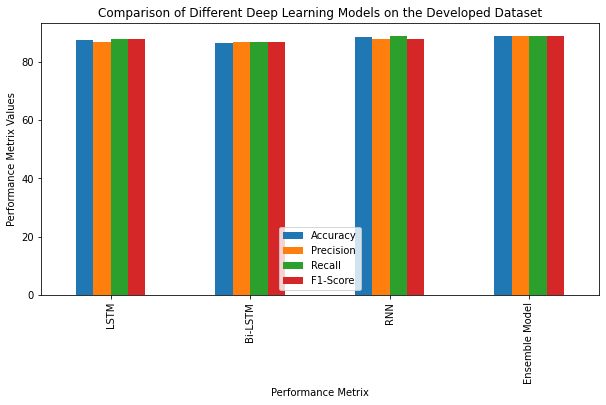

In [ ]:
import pandas as pd

plotdata = pd.DataFrame({

    "Accuracy":[87.6,86.7,88.6,89],

    "Precision":[87,87,88,89],

    "Recall":[88,87,89,89],

    "F1-Score":[88,87,88,89]},

    index=["LSTM", "Bi-LSTM", "RNN", "Ensemble Model"])

plotdata.plot(kind="bar",figsize=(10, 5))

plt.title("Comparison of Different Deep Learning Models on the Developed Dataset")

plt.xlabel("Performance Metrix")

plt.ylabel("Performance Metrix Values")